In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils

from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
from matplotlib.cbook import flatten
model = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [6]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False)

datagen.fit(X_train)

In [7]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss= keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [8]:
h = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 128),
                    steps_per_epoch = len(X_train) // 128, 
                    epochs = 10, 
                    validation_data= (X_valid, y_valid),
                    verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
312/312 [==============================] - 37s 102ms/step - loss: 1.6845 - accuracy: 0.1011 - val_loss: 2.2647 - val_accuracy: 2.0000e-04
Epoch 2/10
312/312 [==============================] - 27s 88ms/step - loss: 1.4396 - accuracy: 0.0961 - val_loss: 1.4960 - val_accuracy: 0.0619
Epoch 3/10
312/312 [==============================] - 28s 89ms/step - loss: 1.3204 - accuracy: 0.0983 - val_loss: 1.1464 - val_accuracy: 0.0777
Epoch 4/10
312/312 [==============================] - 27s 88ms/step - loss: 1.2314 - accuracy: 0.1003 - val_loss: 1.0694 - val_accuracy: 0.1008
Epoch 5/10
312/312 [==============================] - 28s 88ms/step - loss: 1.1657 - accuracy: 0.0989 - val_loss: 1.0809 - val_accuracy: 0.0688
Epoch 6/10
312/312 [==============================] - 28s 88ms/step - loss: 1.1174 - accuracy: 0.1007 - val_loss: 1.1098 - val_accuracy: 0.0811
Epoch 7/10
312/312 [==============================] - 28s 88ms/step - loss: 1.0758 - accuracy: 0.1008 - val_loss: 1.2256 - val_accu

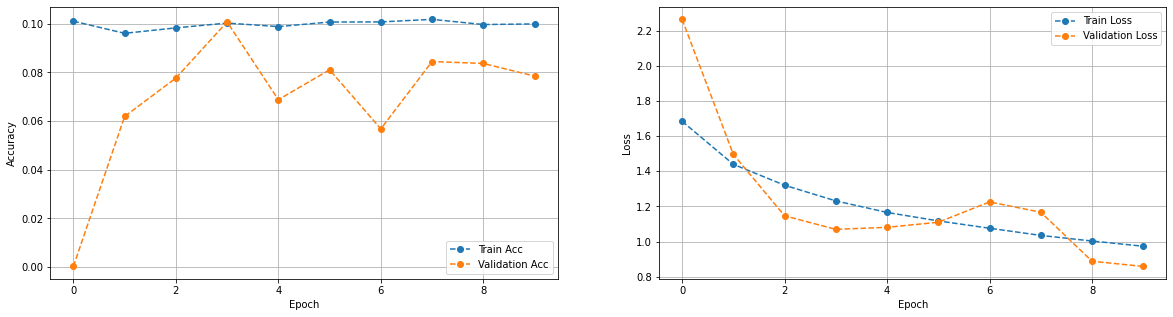

In [9]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [10]:
h = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 128),
                    steps_per_epoch = len(X_train) // 128, 
                    epochs = 15, 
                    validation_data= (X_valid, y_valid),
                    verbose=1)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


312/312 [==============================] - 28s 90ms/step - loss: 0.9591 - accuracy: 0.1007 - val_loss: 0.8986 - val_accuracy: 0.0833
Epoch 2/15
312/312 [==============================] - 27s 88ms/step - loss: 0.9351 - accuracy: 0.1020 - val_loss: 0.8516 - val_accuracy: 0.0909
Epoch 3/15
312/312 [==============================] - 27s 87ms/step - loss: 0.9272 - accuracy: 0.1021 - val_loss: 0.7856 - val_accuracy: 0.0791
Epoch 4/15
312/312 [==============================] - 28s 88ms/step - loss: 0.9062 - accuracy: 0.1034 - val_loss: 0.7810 - val_accuracy: 0.0937
Epoch 5/15
312/312 [==============================] - 28s 89ms/step - loss: 0.8831 - accuracy: 0.1010 - val_loss: 0.7973 - val_accuracy: 0.1097
Epoch 6/15
312/312 [==============================] - 27s 88ms/step - loss: 0.8799 - accuracy: 0.1018 - val_loss: 0.7664 - val_accuracy: 0.0782
Epoch 7/15
312/312 [==============================] - 27s 88ms/step - loss: 0.8659 - accuracy: 0.1018 - val_loss: 0.7568 - val_accuracy: 0.1113
Epo

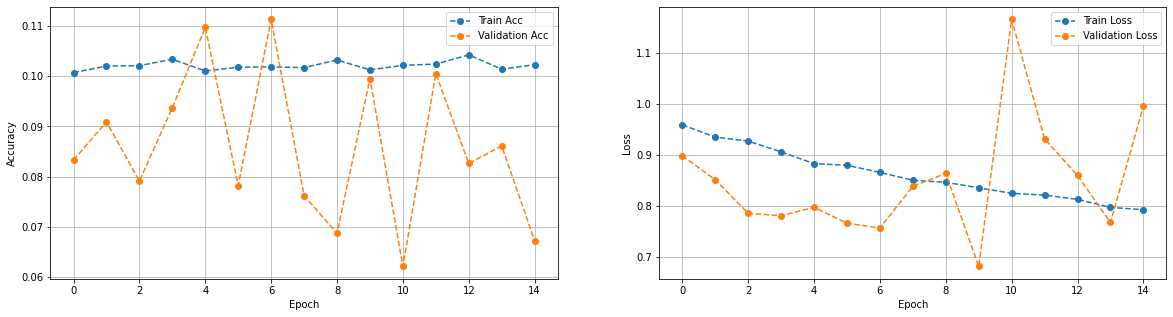

In [11]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()